In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [217]:
from IPython.display import clear_output

In [57]:
import argparse
import os

import torch
from tqdm import tqdm
from torch.autograd import Variable
from torch.autograd import grad as torch_grad
import matplotlib.pyplot as plt
#from torch.utils.tensorboard import writer, SummaryWriter
from torch.utils.data import DataLoader
from math import pi

#from datasets.datasets import Sines
#from models.wgangp import Generator, Critic

In [34]:
!pip install pip-upgrade-tool

In [35]:
!pip install datasets --user

In [12]:
!pip install doqu

  Stored in directory: C:\Users\patel\AppData\Local\pip\Cache\wheels\e3\3b\0a\773eefceefaf461b52b68a846e4de8c0030966e11319030721
Successfully built doqu


In [33]:
!pip install models --user

Command "python setup.py egg_info" failed with error code 1 in C:\Users\patel\AppData\Local\Temp\pip-install-pk7x812u\models\



  Using cached https://files.pythonhosted.org/packages/92/3c/ac1ddde60c02b5a46993bd3c6f4c66a9dbc100059da8333178ce17a22db5/models-0.9.3.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\patel\AppData\Local\Temp\pip-install-pk7x812u\models\setup.py", line 25, in <module>
        import models
      File "C:\Users\patel\AppData\Local\Temp\pip-install-pk7x812u\models\models\__init__.py", line 23, in <module>
        from base import *
    ModuleNotFoundError: No module named 'base'
    
    ----------------------------------------


In [37]:
import datasets

ModuleNotFoundError: No module named 'datasets'

In [14]:
from doqu.recurrent_models import LSTMGenerator, LSTMDiscriminator

ModuleNotFoundError: No module named 'document_base'

In [2]:
df_1=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade001.csv')
df_2=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade002.csv')
df_3=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade003.csv')

In [5]:
print(df_1.head())

   Timestamp  pCut Motor: Torque   pCut CTRL Position controller: Lag error  \
0     -0.188           -0.112131                                  -0.002490   
1     -0.184           -0.088931                                  -0.003863   
2     -0.180           -0.115141                                   0.001630   
3     -0.176           -0.111815                                   0.003003   
4     -0.172           -0.130970                                   0.004376   

    pCut CTRL Position controller: Actual position  \
0                                          -884606   
1                                          -884606   
2                                          -884606   
3                                          -884606   
4                                          -884606   

    pCut CTRL Position controller: Actual speed  \
0                                      0.000000   
1                                     17.166138   
2                                     -6.866455

In [3]:
#=========Train tensor========
df_1=df_1.iloc[:,1:]
df_2=df_2.iloc[:,1:] #to make divisible for a batch of 3
df_train=df_1.append(df_2)
print(df_train.shape)
num=np.array(df_train)
df_1_tensor=torch.tensor(num, dtype=torch.float32)
print(df_1_tensor, df_1_tensor.shape)
#=========Test tensor=========
df_3=df_3.iloc[:,1:]
#df_test=df_1.iloc[1500:,1:]
num=np.array(df_3)
test_tensor=torch.tensor(num, dtype=torch.float32)
print(test_tensor, test_tensor.shape)

(4096, 7)
tensor([[-1.1213e-01, -2.4900e-03, -8.8461e+05,  ...,  1.1128e+04,
          2.5043e+00,  2.6108e-01],
        [-8.8931e-02, -3.8633e-03, -8.8461e+05,  ...,  1.1128e+04,
         -2.5043e+00,  2.6008e-01],
        [-1.1514e-01,  1.6298e-03, -8.8461e+05,  ...,  1.1128e+04,
          7.5130e+00,  2.5908e-01],
        ...,
        [-2.1498e-01, -3.7651e-03, -8.4861e+05,  ...,  2.0825e+04,
          6.7617e+01,  5.4126e-01],
        [-2.2431e-01, -3.8319e-03, -8.4861e+05,  ...,  2.0825e+04,
          6.5113e+01,  5.3676e-01],
        [-2.3109e-01, -1.1520e-03, -8.4861e+05,  ...,  2.0825e+04,
          5.7600e+01,  5.3631e-01]]) torch.Size([4096, 7])
tensor([[-3.0946e-02, -1.1168e-03, -8.4501e+05,  ...,  2.5528e+04,
         -2.5043e+00, -7.8373e-02],
        [-3.5880e-02,  2.5654e-04, -8.4501e+05,  ...,  2.5528e+04,
          0.0000e+00, -8.0376e-02],
        [-4.4996e-02,  3.0031e-03, -8.4501e+05,  ...,  2.5528e+04,
         -1.0017e+01, -7.5367e-02],
        ...,
        [-3.81

torch.Size([4096, 1]) [StandardScaler()]
torch.Size([4096, 1]) [StandardScaler(), StandardScaler()]
torch.Size([4096, 1]) [StandardScaler(), StandardScaler(), StandardScaler()]
torch.Size([4096, 1]) [StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()]
torch.Size([4096, 1]) [StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()]
torch.Size([4096, 1]) [StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()]
torch.Size([4096, 1]) [StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()]


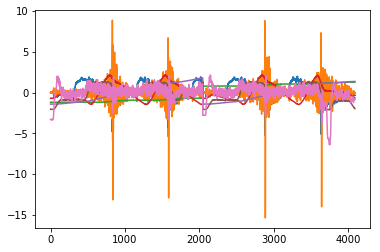

In [5]:
l=[0,1,2,3,4,5,6]
scal_objs=[]
for val in l:
    scalex=StandardScaler().fit(df_1_tensor[:,val].reshape(-1,1))
    scal_objs.append(scalex)
    x=scalex.transform(df_1_tensor[:,val].reshape(-1,1))
    x=torch.tensor(x, dtype=torch.float32)
    print(x.shape,scal_objs)
    df_1_tensor[:,val]=x.reshape(-1)#makes [4096,1] to [4096]
    plt.plot(df_1_tensor[:,val])

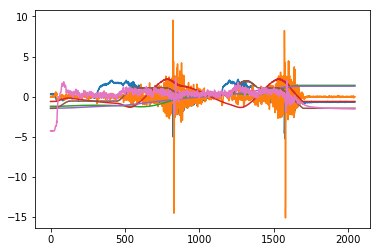

In [6]:
#taking thousand points for test
l=[0,1,2,3,4,5,6]
scal_ob=[]
for val in l:
    x=StandardScaler().fit_transform(test_tensor[:,val].reshape(-1,1))
    x=x.reshape(-1)
    x=torch.tensor(x, dtype=torch.float32)
    test_tensor[:,val]=x
    plt.plot(test_tensor[:,val])

In [7]:
num_df1=np.array(df_1_tensor)
print(num_df1,num_df1.shape)
dummy=torch.tensor(num_df1)
print(dummy,dummy.shape,dummy.shape[0])

[[-0.01204535 -0.06168866 -1.1910746  ... -1.4153684  -2.0585477
  -3.2994404 ]
 [ 0.05072989 -0.09686856 -1.1910746  ... -1.4153684  -2.0666332
  -3.308309  ]
 [-0.02018785  0.04385107 -1.1910746  ... -1.4153684  -2.050462
  -3.3171775 ]
 ...
 [-0.29031998 -0.09435221  1.279744   ...  1.363738   -1.9534342
  -0.81901   ]
 [-0.31556702 -0.09606233  1.279744   ...  1.363738   -1.9574771
  -0.8588762 ]
 [-0.33391637 -0.02741268  1.2798126  ...  1.363738   -1.9696056
  -0.86286974]] (4096, 7)
tensor([[-0.0120, -0.0617, -1.1911,  ..., -1.4154, -2.0585, -3.2994],
        [ 0.0507, -0.0969, -1.1911,  ..., -1.4154, -2.0666, -3.3083],
        [-0.0202,  0.0439, -1.1911,  ..., -1.4154, -2.0505, -3.3172],
        ...,
        [-0.2903, -0.0944,  1.2797,  ...,  1.3637, -1.9534, -0.8190],
        [-0.3156, -0.0961,  1.2797,  ...,  1.3637, -1.9575, -0.8589],
        [-0.3339, -0.0274,  1.2798,  ...,  1.3637, -1.9696, -0.8629]]) torch.Size([4096, 7]) 4096


In [8]:
num_df1=np.array(df_1_tensor)
print(num_df1,num_df1.shape)
dummy2=torch.tensor(num_df1)
print(dummy2,dummy2.shape)

[[-0.01204535 -0.06168866 -1.1910746  ... -1.4153684  -2.0585477
  -3.2994404 ]
 [ 0.05072989 -0.09686856 -1.1910746  ... -1.4153684  -2.0666332
  -3.308309  ]
 [-0.02018785  0.04385107 -1.1910746  ... -1.4153684  -2.050462
  -3.3171775 ]
 ...
 [-0.29031998 -0.09435221  1.279744   ...  1.363738   -1.9534342
  -0.81901   ]
 [-0.31556702 -0.09606233  1.279744   ...  1.363738   -1.9574771
  -0.8588762 ]
 [-0.33391637 -0.02741268  1.2798126  ...  1.363738   -1.9696056
  -0.86286974]] (4096, 7)
tensor([[-0.0120, -0.0617, -1.1911,  ..., -1.4154, -2.0585, -3.2994],
        [ 0.0507, -0.0969, -1.1911,  ..., -1.4154, -2.0666, -3.3083],
        [-0.0202,  0.0439, -1.1911,  ..., -1.4154, -2.0505, -3.3172],
        ...,
        [-0.2903, -0.0944,  1.2797,  ...,  1.3637, -1.9534, -0.8190],
        [-0.3156, -0.0961,  1.2797,  ...,  1.3637, -1.9575, -0.8589],
        [-0.3339, -0.0274,  1.2798,  ...,  1.3637, -1.9696, -0.8629]]) torch.Size([4096, 7])


In [19]:
train_rows=df_1_tensor.shape[0]
features=df_1_tensor.shape[1]
test_rows=test_tensor.shape[0]
test_columns=test_tensor.shape[1]
print(train_rows,features,test_rows,test_columns)

4096 7 2048 7


In [204]:
class Discriminator(nn.Module):
    def __init__(self, input_len, hidden_len):#, output_len=1):
        super(Discriminator, self).__init__()
        self.hidden_len=hidden_len
        
        self.layer1 = nn.Sequential(
            nn.Linear(input_len,hidden_len),
            nn.LeakyReLU(0.2)
            #nn.Dropout(0.3)
        )
        self.layer2 = nn.Sequential(
            nn.LSTM(hidden_len,hidden_len),
            #nn.LeakyReLU(0.2)
            #nn.Dropout(0.3)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(hidden_len, input_len),#to get mu and logvar that we use to get samples of the distribution
            nn.Sigmoid() #for BCE
        )
    
    def forward(self, x):
        length=x.shape[0]
        x= self.layer1(x)
        x=x.reshape(1,4096,self.hidden_len) ###frustrtated 
        x,_= self.layer2(x)
        x= self.layer3(x)
        return x
hidden_len=16
discriminator = Discriminator(features,16)

In [200]:
pop=discriminator(df_1_tensor)

In [201]:
print(pop.shape,pop)

torch.Size([1, 4096, 16]) tensor([[[0.0471, 1.0366, 0.3289,  ..., 1.3935, 0.7554, 1.6875],
         [0.0493, 1.0578, 0.3136,  ..., 1.3930, 0.7455, 1.6905],
         [0.0788, 1.0352, 0.3598,  ..., 1.4028, 0.7923, 1.7295],
         ...,
         [0.0223, 0.2159, 1.4911,  ..., 0.8832, 0.0383, 0.7783],
         [0.0202, 0.2235, 1.4998,  ..., 0.8967, 0.0518, 0.7896],
         [0.0404, 0.2148, 1.5264,  ..., 0.9016, 0.0707, 0.8180]]],
       grad_fn=<ViewBackward>)


In [203]:
class Generator(nn.Module):
    def __init__(self,input_len, hidden_len):#, output_len=2):
        super(Generator, self).__init__()
        self.hidden_len=hidden_len
        self.input_len=input_len
        
        self.layer1 = nn.Sequential(
            nn.Linear(input_len,hidden_len),
            nn.ReLU()
        )

        self.layer2=nn.Sequential(
              nn.LSTM(hidden_len,hidden_len),
              #nn.ReLU()
            )
        self.layer3 = nn.Sequential(
            nn.Linear(hidden_len,input_len),
            nn.Sigmoid() #for BCE
        )
# not sure if sample is directly required
#     def getsample(self, mu, logvar):
#         if self.training: #inbuilt object which according to me is inherited from nn.Module, comes when model.train() used
#             stan_dev=logvar.mul(0.5).exp_()
#             eps = stan_dev.data.new(stan_dev.size()).normal_() #acually epsilon is form normal dis table, sample is the whole Mew+X*sigma
#             return eps.mul(stan_dev).add_(mu) #Mew+X*sigma
#         else:
#             return mu    
# dont think this is possible in GAN
    
    def forward(self, x):
        length=x.shape[0]
        x=self.layer1(x)
        x=x.reshape((1,length,self.hidden_len))
        x,_=self.layer2(x)
        x=self.layer3(x)
#         mu=mu_logvar[:,:,0:self.input_len]
#         logvar=mu_logvar[:,:,self.input_len:self.input_len*2]
        return x
hidden_len=16
generator= Generator(features,hidden_len)
#no need to send value to initialize, made quite simple

# Quite terrible generation by State of the art GAN using normal training---
this is done after training the network

After training I try and feed random noise to the Generator and see the output

In [232]:
pop=generator(torch.randn(4096,7))

In [233]:
print(pop.shape,pop)

torch.Size([1, 4096, 7]) tensor([[[0.0118, 0.0355, 0.9059,  ..., 0.9027, 0.3138, 0.1830],
         [0.0130, 0.0358, 0.8987,  ..., 0.8910, 0.3189, 0.1714],
         [0.0129, 0.0384, 0.9085,  ..., 0.9053, 0.3039, 0.1920],
         ...,
         [0.0100, 0.0302, 0.8914,  ..., 0.8890, 0.3390, 0.1602],
         [0.0128, 0.0346, 0.8909,  ..., 0.8784, 0.3386, 0.1640],
         [0.0106, 0.0310, 0.8915,  ..., 0.8808, 0.3544, 0.1530]]],
       grad_fn=<SigmoidBackward>)


In [ ]:
# pop is the data I get after training the network for 10 epochs and feed noise to the generator

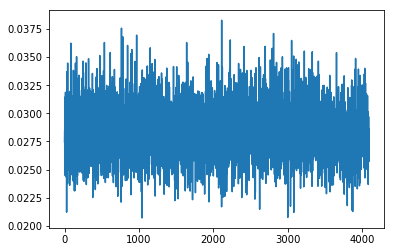

In [248]:
plt.plot(pop[0,:,3].detach().numpy())

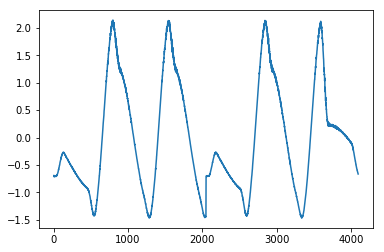

In [247]:
plt.plot(df_1_tensor[:,3])

In [110]:
hidden_len=16
generator= Generator(features,hidden_len)
mu_logvar=generator(df_1_tensor)
print(pop.shape,pop)
mu=mu_logvar[:,:,0:features]
logvar=mu_logvar[:,:,features:features*2]

torch.Size([1, 4096, 14]) tensor([[[ 0.0300,  0.0475,  0.0376,  ..., -0.0509,  0.0743, -0.2698],
         [ 0.0316,  0.0471,  0.0380,  ..., -0.0530,  0.0726, -0.2705],
         [ 0.0286,  0.0472,  0.0366,  ..., -0.0491,  0.0759, -0.2699],
         ...,
         [ 0.0334,  0.0343,  0.0840,  ...,  0.0346,  0.0843, -0.1698],
         [ 0.0341,  0.0347,  0.0842,  ...,  0.0337,  0.0837, -0.1708],
         [ 0.0341,  0.0344,  0.0842,  ...,  0.0333,  0.0839, -0.1703]]],
       grad_fn=<AddBackward0>)


In [140]:
data = torch.ones(4096, 7).fill_(0.9)
print(data)

tensor([[0.9000, 0.9000, 0.9000,  ..., 0.9000, 0.9000, 0.9000],
        [0.9000, 0.9000, 0.9000,  ..., 0.9000, 0.9000, 0.9000],
        [0.9000, 0.9000, 0.9000,  ..., 0.9000, 0.9000, 0.9000],
        ...,
        [0.9000, 0.9000, 0.9000,  ..., 0.9000, 0.9000, 0.9000],
        [0.9000, 0.9000, 0.9000,  ..., 0.9000, 0.9000, 0.9000],
        [0.9000, 0.9000, 0.9000,  ..., 0.9000, 0.9000, 0.9000]])


In [212]:
def train_generator(optimizer, generated_data):
    #feeding data to generator object
    N=generated_data.data.size(0)
    optimizer.zero_grad()
    
#Run the generated data through the discriminator
    prediction=discriminator(generated_data)

# using x to generate mu and logvar---- actially wont work in GAN i think
# Train the generator with the flipped target ie target is 0.9
    # using sogmoid since input has to be between 0 and 1
    ones_target = torch.ones(length, features).fill_(0.9)
    
    error=loss(prediction, ones_target)
    error.backward()
    
    optimizer.step()

    return error

In [155]:
def train_discriminator(optimizer, real_data, generated_data):
    N=real_data.size(0)
    optimizer.zero_grad()
    
# Train discriminator on real data
    prediction_real = discriminator(real_data)
    ones_target = torch.ones(length, features).fill_(0.9)
    
    error_real = loss(prediction_real, ones_target)
    error_real.backward()
    
# Now train it on the generated data
    prediction_generated=discriminator(generated_data)
    zeros_target=torch.zeros(length, features)
    error_generated=loss(prediction_generated, zeros_target)
    error_generated.backward()
    
    optimizer.step()
    
    return error_real + error_generated, prediction_real, prediction_generated

In [142]:
print(torch.zeros(length, features).shape)

torch.Size([4096, 7])


In [125]:
features=df_1_tensor.shape[1]
length=df_1_tensor.shape[0]
print(features,length)

7 4096


In [128]:
generator_input = torch.randn(length,features)
print(generator_input.shape,generator_input)

torch.Size([4096, 7]) tensor([[ 0.5782, -1.0735, -0.4241,  ..., -1.2504, -2.1099,  0.9686],
        [-2.0597, -0.9863, -1.8043,  ...,  0.5064,  1.4252,  0.2861],
        [-2.3956,  0.6608, -0.3533,  ...,  0.6131,  0.2037,  0.9399],
        ...,
        [-0.8105, -1.8216,  0.0849,  ...,  0.9396,  1.4353,  1.9747],
        [-1.4459,  1.5719,  0.6610,  ...,  0.9998,  1.0377, -0.3131],
        [ 1.4846,  0.3779,  0.4835,  ..., -0.2526,  0.4527,  0.0176]])


In [172]:
real_data = df_1_tensor.reshape(length,features)
print(real_data.shape)

torch.Size([4096, 7])


In [214]:
d_lr = 1e-3
g_lr = 1e-3
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=d_lr)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=g_lr)
loss = nn.BCELoss()
d_losses=[]
g_losses=[]
printing_epoch = 100

In [121]:
num_epochs=10
discriminator_steps = 20
generator_steps = 20

In [220]:
resources='Gan_syn'

In [224]:
# Set the models to training mode
discriminator.train()
generator.train()

for epoch in range(num_epochs):
    real_data= None
    generated_data= None
    
    for d_steps in range(discriminator_steps):
        real_data = df_1_tensor.reshape(length,features) #data generated form the polynomial
        generator_input = torch.randn(length,features) #Data from the noise function we built
#----------------generator input and generator data are different, dont directly feed noise in discriminator
# instead feed noise to gen and o/p of generator as generator data to discriminator
#       Dont calculate gradient for this
        generated_data=generator(generator_input).detach()
    
        d_error, d_pred_real, d_pred_generated = \
            train_discriminator(
                d_optimizer, real_data, generated_data)
        d_losses.append(d_error.item())
        
    for g_steps in range(generator_steps):
        generator_input = torch.randn(length,features)
        
        generated_data=generator(generator_input)
        
        g_error = train_generator(g_optimizer, generated_data)
        g_losses.append(g_error.item())
        
    print("Epoch")
    print(epoch)
    print("Discriminator Loss:")
    print(d_error.item())
    print("Generator Loss:")
    print(g_error.item())
        
#     if(epoch% printing_epoch==0):
#         clear_output()
#         print("Epoch")
#         print(epoch)
#         print("Discriminator Loss:")
#         print(d_error.item())
#         print("Generator Loss:")
#         print(g_error.item())
#         current_status(real_data, generated_data, epoch)

Epoch
0
Discriminator Loss:
0.47903263568878174
Generator Loss:
1.9483976364135742
Epoch
1
Discriminator Loss:
0.44602274894714355
Generator Loss:
2.2072551250457764
Epoch
2
Discriminator Loss:
0.4218013882637024
Generator Loss:
2.4419171810150146
Epoch
3
Discriminator Loss:
0.404962956905365
Generator Loss:
2.4979803562164307
Epoch
4
Discriminator Loss:
0.3995811343193054
Generator Loss:
2.1709229946136475
Epoch
5
Discriminator Loss:
0.4117361903190613
Generator Loss:
2.10115122795105
Epoch
6
Discriminator Loss:
0.42125001549720764
Generator Loss:
2.3177051544189453
Epoch
7
Discriminator Loss:
0.41825222969055176
Generator Loss:
2.4288265705108643
Epoch
8
Discriminator Loss:
0.41126537322998047
Generator Loss:
2.560979127883911
Epoch
9
Discriminator Loss:
0.40250805020332336
Generator Loss:
2.719391107559204


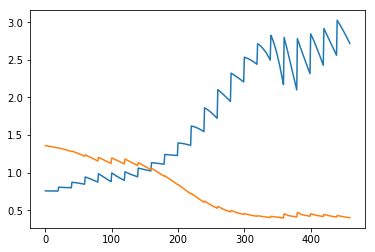

In [231]:
plt.plot(g_losses)
plt.plot(d_losses)

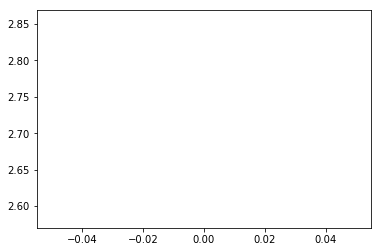

In [226]:
plt.plot(g_error.item())

In [107]:
print(pop.shape,pop)

torch.Size([1, 4096, 14]) tensor([[[ 0.2526, -0.0589,  0.0018,  ..., -0.1683, -0.1069, -0.2383],
         [ 0.2523, -0.0595,  0.0015,  ..., -0.1684, -0.1071, -0.2388],
         [ 0.2533, -0.0576,  0.0023,  ..., -0.1681, -0.1088, -0.2369],
         ...,
         [ 0.1751, -0.1086,  0.0160,  ..., -0.1915, -0.0359, -0.2161],
         [ 0.1764, -0.1077,  0.0155,  ..., -0.1910, -0.0357, -0.2165],
         [ 0.1768, -0.1075,  0.0147,  ..., -0.1915, -0.0366, -0.2157]]],
       grad_fn=<AddBackward0>)


In [105]:
pop=generator(df_1_tensor)

In [68]:
pop=discriminator(df_1_tensor)

In [99]:
x=pop[0,:,3].detach().numpy()

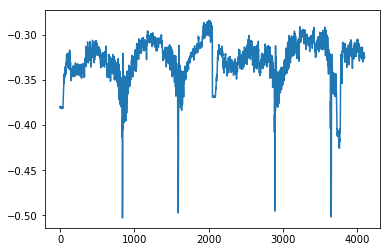

In [100]:
plt.plot(x)

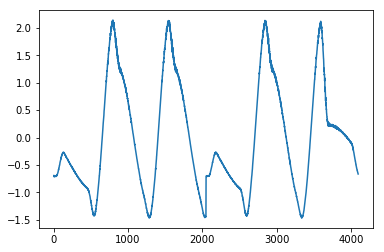

In [101]:
plt.plot(dummy2[:,3])

In [221]:
def current_status(real, generated, epoch):
    x, y = zip(*generated.tolist())
    plt.scatter(x, y, label='Generated Data')
    x, y = zip(*real.tolist())
    plt.scatter(x, y, label='Real Data')
    plt.legend(loc='upper right')
    plt.xlabel("input")
    plt.title("Comparsion of Real vs Generated Data - Epoch %s" %epoch)
    n=str(epoch).zfill(4)
    save_location = resources+ 'outputs/epoch-%s.png' %n
    plt.savefig(save_location, bbox_inches='tight')   ##quite useful
    plt.show()

SyntaxError: 'return' outside function (<ipython-input-63-adbe5eee2594>, line 23)